In [1]:
import pandas as pd

prior_order_df = pd.read_csv('./data/order_products__prior.csv')
prior_order_train_df = pd.read_csv('./data/order_products__train.csv')
order_df = pd.read_csv('./data/orders.csv')
product_df = pd.read_csv('./data/products.csv')
aisles_df = pd.read_csv('./data/aisles.csv')
department_df = pd.read_csv('./data/departments.csv')
sample_df = pd.read_csv('./data/sample_submission.csv') # 결과 도출하는 예시 파일

### 데이터 셋 의미
1. sampe_submission : 재구매 예측 모델의 결과를 뽑아낼 때 어떻게 도출하는지에 대한 파일
2. departments : 물건 종류 파일
3. aisles : 특정 제품 진열 구역
4. product_df : 제품 이름, aisle_id, department_id 존재
5. orders : 고객 주문 정보
6. order_products__prior : 과거 주문 기록을 나타낸다.
7. order_products__train : 모델 훈련에 사용되는 주문 데이터이다.

### orders 컬럼 설명

1. **order_id**: 
   - 각 주문을 고유하게 식별하는 번호입니다. 주문의 식별자로 사용됩니다.

2. **user_id**: 
   - 주문을 한 고객을 고유하게 식별하는 번호입니다. 고객의 행동 분석이나 맞춤형 서비스를 제공하는 데 사용됩니다.

3. **eval_set**: 
   - 데이터가 속한 세트를 나타내며, 주로 "train", "test", "prior" 등의 값으로 나뉩니다. 
   - 이 정보는 모델 훈련과 평가를 위한 데이터 세트를 구분하는 데 사용됩니다. 예를 들어, `train` 세트는 모델을 학습하는 데 사용되고, `test` 세트는 성능 평가에 사용됩니다.

4. **order_number**: 
   - 고객이 지금까지 한 주문의 순서 번호입니다. 예를 들어, 고객이 첫 번째로 한 주문은 1, 두 번째는 2로 나타납니다. 이를 통해 고객의 주문 패턴을 분석할 수 있습니다.

5. **order_dow**: 
   - 주문이 이루어진 **요일**을 나타내는 숫자입니다. 일반적으로 0~6으로 표현되며, 0은 일요일, 1은 월요일, ..., 6은 토요일을 의미합니다. 이는 고객의 구매 행동을 요일별로 분석하는 데 유용합니다.

6. **order_hour_of_day**: 
   - 주문이 이루어진 시간대를 나타내는 숫자입니다. 0~23으로 표현되어, 0은 자정, 23은 오후 11시를 의미합니다. 고객이 어떤 시간대에 주로 주문하는지를 분석하는 데 사용됩니다.

7. **days_since_prior_order**: 
   - 이전 주문일로부터 경과한 일수를 나타내며, 이는 고객의 재구매 주기를 분석하는 데 유용합니다. 예를 들어, 값이 0이면 이전 주문이 바로 직전이며, 값이 7이면 일주일 전에 주문이 있었음을 의미합니다.

이 정보들은 고객 행동 분석, 구매 패턴 예측, 추천 시스템 구축 등 다양한 분석 작업에 활용될 수 있습니다.

### order_products__prior 데이터

- order_id: 주문 ID
- product_id: 상품 ID
- add_to_cart_order: 해당 주문에서 상품이 장바구니에 추가된 순서
- reordered: 재주문 여부 (1은 재주문, 0은 처음 주문)

## 1. 데이터 합치기

In [7]:
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
# user가 어떤 물품을 구매했는지
df = order_df.merge(prior_order_df, how='inner', on='order_id')

In [10]:
df.merge(product_df, how='inner', on='product_id').head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17


In [13]:
# 
prior_df = df[df['eval_set'] == 'prior']

In [15]:
prior_df[prior_df['days_since_prior_order'].isna() == True]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434368,3154581,206209,prior,1,3,11,NaN,20073,9,0
32434369,3154581,206209,prior,1,3,11,NaN,13176,10,0
32434370,3154581,206209,prior,1,3,11,NaN,20842,11,0
32434371,3154581,206209,prior,1,3,11,NaN,23594,12,0


days_since_prior_order 컬럼 값이 Nan이라는 것은 해당 물품의 첫 주문 건수로 보면 될 것 같습니다.

In [18]:
prior_df = prior_df.merge(product_df, how='inner', on='product_id')

In [19]:
prior_df = prior_df.merge(aisles_df, how='inner', on='aisle_id')

In [22]:
prior_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods


In [24]:
prior_df = prior_df.merge(department_df, how='inner', on='department_id')

In [26]:
prior_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


### 최종적으로 어떤 고객이 어떤 물품을 샀는지 묶어놓았음

In [29]:
prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.6+ GB


In [31]:
prior_df.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'aisle',
 'department']

In [33]:
# 컬럼 순서 바꾸기
columns = ['order_id',
         'user_id',
         'eval_set',
         'order_number',
         'order_dow',
         'order_hour_of_day',
         'days_since_prior_order',
         'product_name',
         'aisle',
         'department',
         'product_id',
         'add_to_cart_order',
         'reordered',
         'aisle_id',
         'department_id'
          ]

In [35]:
prior_df = prior_df[columns]

In [36]:
len(prior_df['product_name'].unique())

49677

In [39]:
prior_df.to_csv('data.csv')

## 2. 고객 재구매 주기 분석

- days_since_prior_order 해당 컬럼을 사용하여 고객들의 재구매 주기가 어떻게 되는지 확인을 해볼 것이며,
nan 값은 첫구매인 항목들을 뜻하므로 재구매 주기에서 빼도 상관없는 것으로 판단.
- 그래프 확인 결과 사람들이 거의 일주일 간격으로 재구매하는 빈도 수가 제일 많은 것으로 확인

In [41]:
prior_df['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11.,  4.,  5.,  2., 23., 26.,
       25., 16.,  1., 18., 24., 22.])

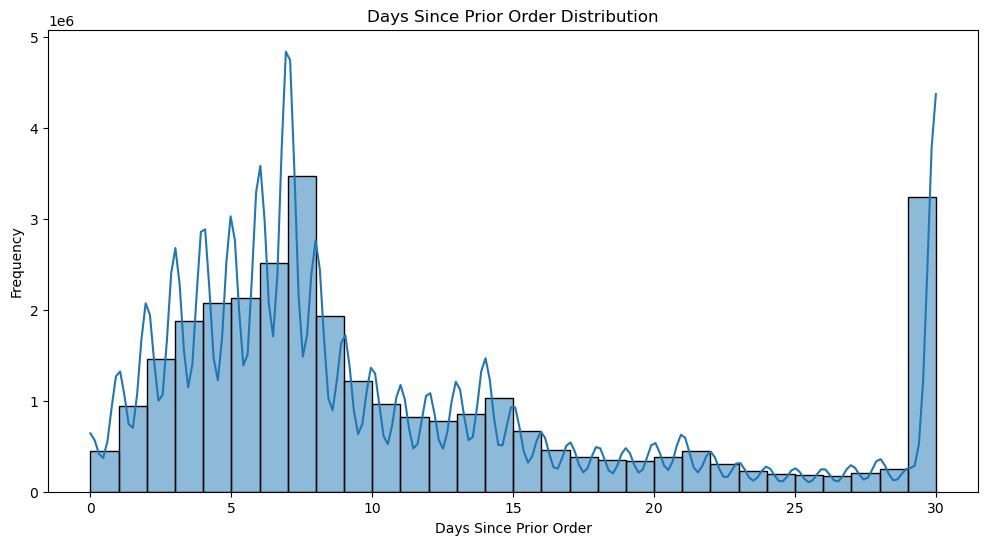

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(prior_df['days_since_prior_order'].dropna(), bins=30, kde=True)
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')

plt.show()

30일 주기 구매율이 높은 이유는 30일 이후의 주문 건들도 포함이라서 높은 것.

## 3. 주문 빈도 및 횟수 분석
- 고객마다 주문한 횟수를 분석해볼 것이며 이 때 주문 ID의 개수를 셀 때 ID가 중복될 필요가 없으므로 nunique() 함수 사용
- 즉, 해당 데이터에는 하나의 주문에 여러 개의 물품들을 구매할 때 세분화 되어 물품하나하나에 해당 주문ID가 들어가 있습니다. (이 것을 생각할 것)

In [45]:
user_order_count = prior_df.groupby('user_id')['order_id'].nunique()

In [46]:
user_order_count = user_order_count.to_frame().reset_index()

In [49]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# sns.barplot(data=user_order_count, x='user_id', y='order_id')
# plt.title('User order frequency')
# plt.xlabel('User ID')
# plt.ylabel('Order Count')

# plt.show()

위 코드 사용 시 정확히 보이지는 않으나 주문 빈도는 다양한 것으로 확인
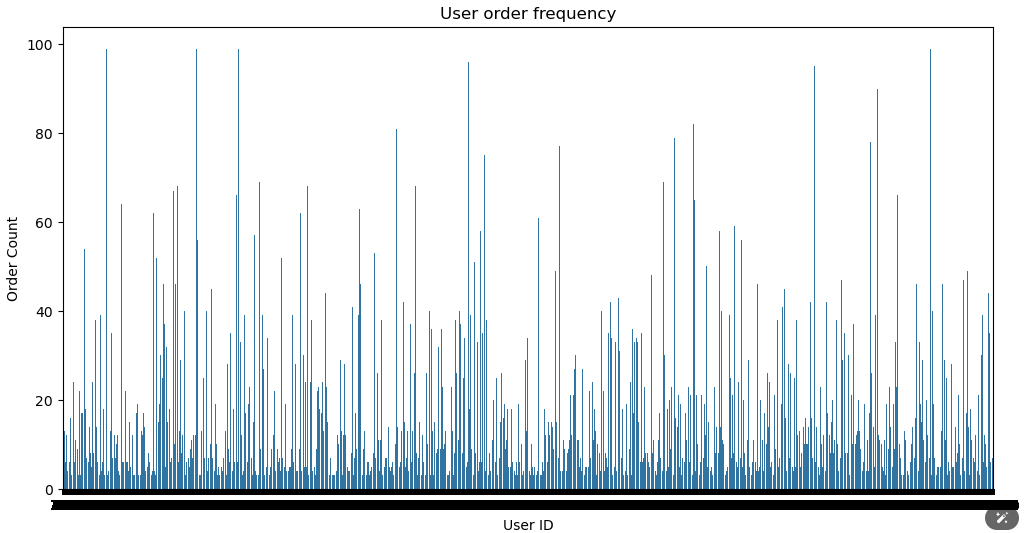

### 시간대별 주문 분포 확인

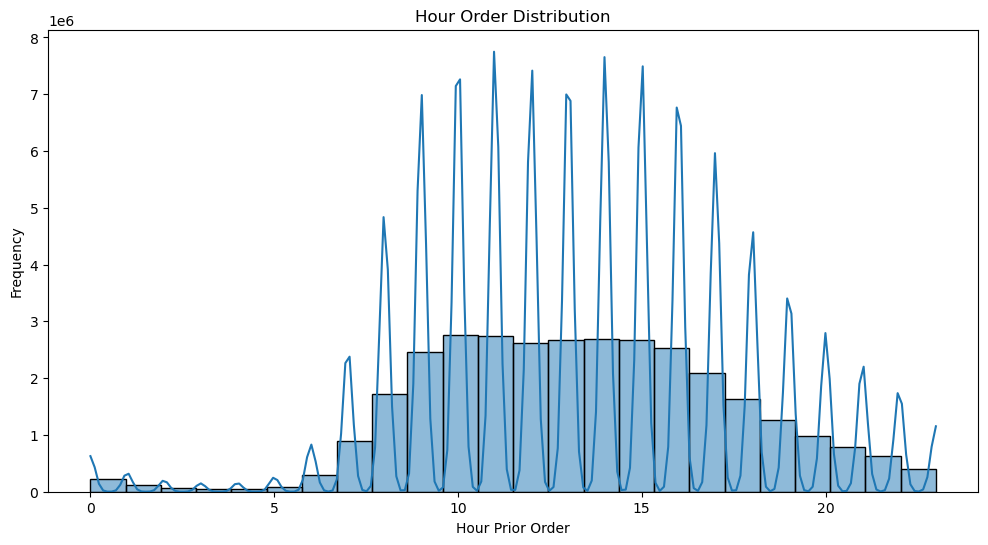

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(prior_df['order_hour_of_day'], bins=24, kde=True)
plt.title('Hour Order Distribution')
plt.xlabel('Hour Prior Order')
plt.ylabel('Frequency')

plt.show()

확실히 새벽 시간대에 구매 빈도 수는 확실히 적은 것으로 확인됨ㅡㅡ

In [56]:
prior_df.groupby('order_dow')['order_dow'].count()

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: order_dow, dtype: int64

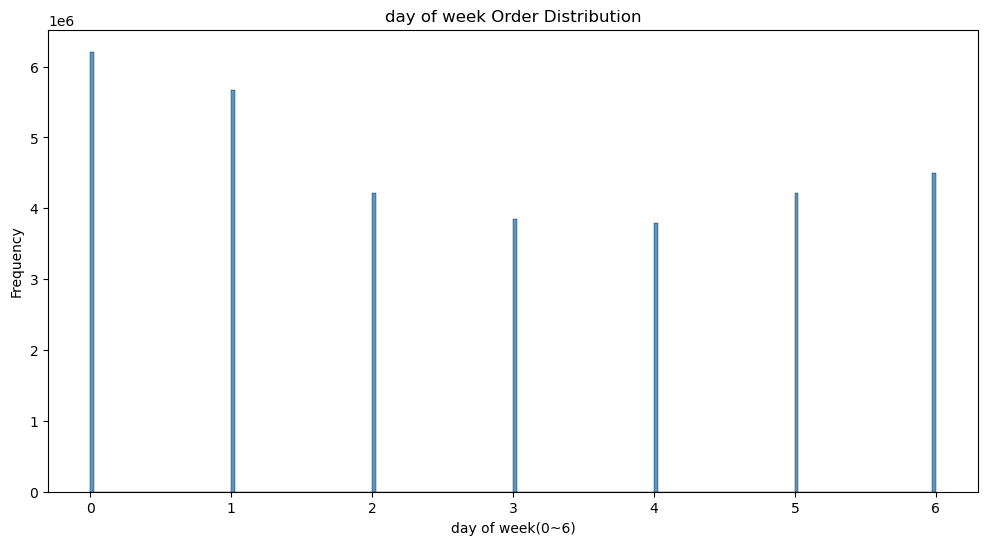

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(prior_df['order_dow'])
plt.title('day of week Order Distribution')
plt.xlabel('day of week(0~6)')
plt.ylabel('Frequency')

plt.show()

- 어느 요일에 제일 많이 구매를 하는 지 확인
- 일요일과 월요일의 구매 횟수가 매우 많은 것으로 확인됨. 만약 이벤트 등 한다면 사람들이 구매를 제일 많이 하는 요일인 일요일과 월요일에 한다면 좋을 것이라 판단

## 4. 주문 유형 및 상품 선호도 분석
- 우선 department로 어떤 물품유형이 많이 팔리는지 확인 해보겠습니다.
  

In [62]:
prior_df['department'].unique()

array(['beverages', 'dairy eggs', 'snacks', 'household', 'produce',
       'breakfast', 'pantry', 'deli', 'frozen', 'personal care',
       'meat seafood', 'international', 'bakery', 'canned goods',
       'dry goods pasta', 'alcohol', 'pets', 'babies', 'other', 'missing',
       'bulk'], dtype=object)

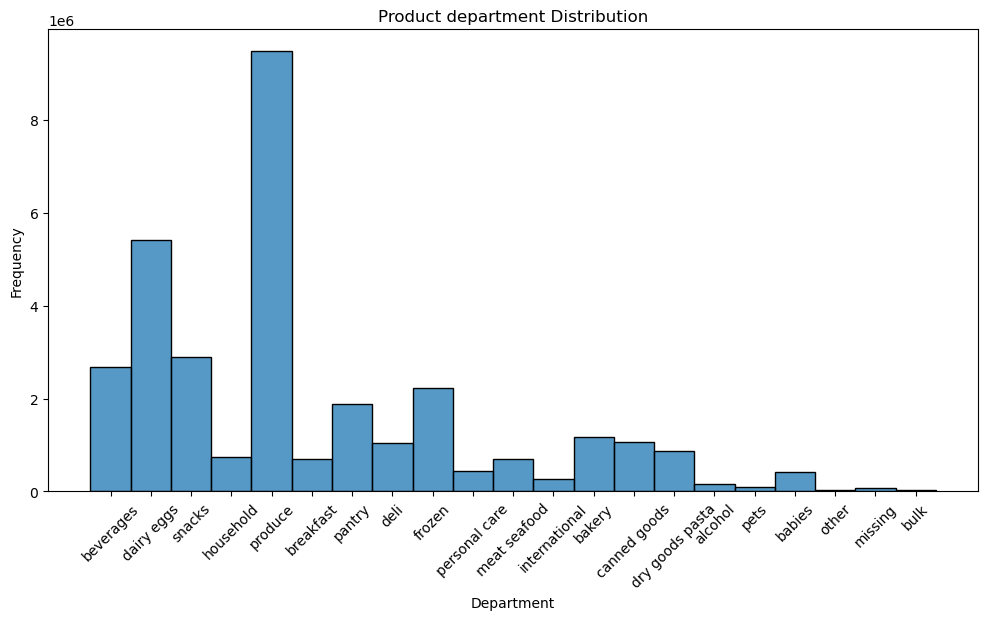

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(prior_df['department'])
plt.title('Product department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

물품 카테고리 선호도 확인 결과 produce항목의 물품이 매우 많이 팔리는 것으로 확인 되었습니다. 
그럼 이제 product항목 중 어떤 물품의 선호도가 높은지 확인 해보겠습니다.

In [67]:
produce_prior_df = prior_df[prior_df['department'] == 'produce']

In [68]:
produce_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9479291 entries, 8 to 32434480
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_name            object 
 8   aisle                   object 
 9   department              object 
 10  product_id              int64  
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  aisle_id                int64  
 14  department_id           int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 1.1+ GB


In [71]:
len(produce_prior_df['product_name'].unique())

1684

In [73]:
produce_prior_count_df = produce_prior_df.groupby('product_name')['product_name'].count().to_frame()

In [74]:
produce_prior_count_df.rename(columns={'product_name':'count'}, inplace=True)

In [77]:
produce_prior_count_df.sort_values(by='count', ascending=False).head(10)

,count
product_name,
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584
Organic Avocado,176815
Large Lemon,152657
Strawberries,142951
Limes,140627


- produce 제품 중 바나나 항목이 제일 많이 팔리는 것으로 확인 되었습니다.
- 즉, **고객들은 대부분 해당 이커머스에서 과일이나, 채소 류들의 물품 들을 많이 사고 있으면서 그 중에 바나나가 제일 잘팔리며 Top10을 확인 해본 결과
과일류를 대부분 많이 사는 것으로 확인됨.**
- 그럼 과일에 대한 이벤트 같은 것을 다양하게 하면 효과가 있을 것이라 판단.

In [88]:
# 바나나 구매한 고객들
# banana_customers = produce_prior_df[produce_prior_df['product_name'] == 'Banana']

# 바나나 구매 횟수
purchase_counts = produce_prior_df['user_id'].value_counts()

In [90]:
purchase_counts

user_id
103593    1331
105213    1117
167977    1116
106161    1114
73080     1112
          ... 
78850        1
192454       1
78862        1
143545       1
160559       1
Name: count, Length: 193237, dtype: int64

In [94]:
# 바나나를 구매한 총 고객 수
total_customers = purchase_counts.count()
count = [1, 5, 10, 15]
for i in range(1, 50, 4):
    # 반복 구매한 고객 수
    repeat_customers= purchase_counts[purchase_counts > i].count()
    # 반복 구매율
    repeat_customers_rate = repeat_customers / total_customers * 100

    print(f'Produce의 반복 구매율 (반복 구매 횟수 {i + 1}번 이상): {repeat_customers_rate:.2f}%')

Produce의 반복 구매율 (반복 구매 횟수 2번 이상): 96.63%
Produce의 반복 구매율 (반복 구매 횟수 6번 이상): 84.68%
Produce의 반복 구매율 (반복 구매 횟수 10번 이상): 74.31%
Produce의 반복 구매율 (반복 구매 횟수 14번 이상): 65.48%
Produce의 반복 구매율 (반복 구매 횟수 18번 이상): 58.16%
Produce의 반복 구매율 (반복 구매 횟수 22번 이상): 51.99%
Produce의 반복 구매율 (반복 구매 횟수 26번 이상): 46.82%
Produce의 반복 구매율 (반복 구매 횟수 30번 이상): 42.46%
Produce의 반복 구매율 (반복 구매 횟수 34번 이상): 38.80%
Produce의 반복 구매율 (반복 구매 횟수 38번 이상): 35.59%
Produce의 반복 구매율 (반복 구매 횟수 42번 이상): 32.80%
Produce의 반복 구매율 (반복 구매 횟수 46번 이상): 30.35%
Produce의 반복 구매율 (반복 구매 횟수 50번 이상): 28.17%


- 바나나를 구매한 총 고객 수에서 약 75%는 바나나를 재구매 하는 것을 확인 할 수 있었음.
- 바나나는 확실히 즐겨 찾는 항목은 맞는 것 같습니다.

## 5. 구매 빈도 수를 바탕으로 분류하여, 행동 패턴을 분석하기
- 일주일에 한 번, 한 달에 한 번 재구매를 하는 횟수가 많은 것으로 보아 고객들이 구매를 하는 것을 확인
- 재구매 횟수를 보고 얼만큼하는지 확인 해보기

### 재구매 횟수 확인하기

In [127]:
reorder_count = prior_df.groupby('user_id')['order_id'].nunique().to_frame().sort_values(by='order_id', ascending=False).reset_index()

### 이상치가 다수 확인됨.

<Axes: xlabel='order_id'>

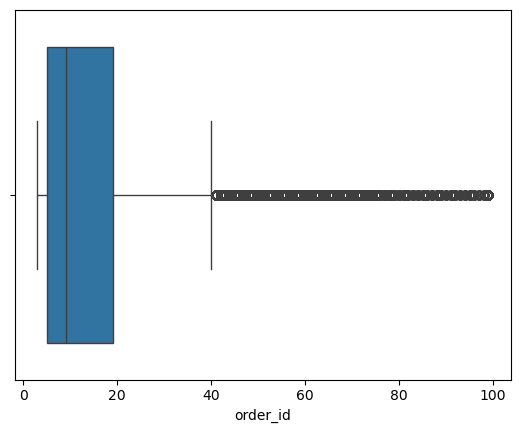

In [129]:
sns.boxplot(x=reorder_count['order_id'])

In [133]:
reorder_count['order_id'].describe()

count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max          99.000000
Name: order_id, dtype: float64

평균이 15인데 max가 99여서 이상하다 판단됨. 그래서 박스플롯으로 확인

In [143]:
Q1 = reorder_count['order_id'].quantile(0.25)
Q3 = reorder_count['order_id'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.25 * IQR
upper_bound = Q3 + 1.25 * IQR

outliers = reorder_count[(reorder_count['order_id'] < lower_bound) | (reorder_count['order_id'] > upper_bound)]
outliers

,user_id,order_id
0,152340,99
1,185641,99
2,185524,99
3,81678,99
4,70922,99
...,...,...
20639,174028,37
20640,67465,37
20641,17388,37
20642,66567,37


### 이상치 구매 주기 확인하기

In [163]:
top_10_outliers = outliers.head(10)

In [165]:
outlier_list = outliers['user_id'].tolist()

In [167]:
top_10_outliers = prior_df[prior_df['user_id'].isin(outlier_list)]

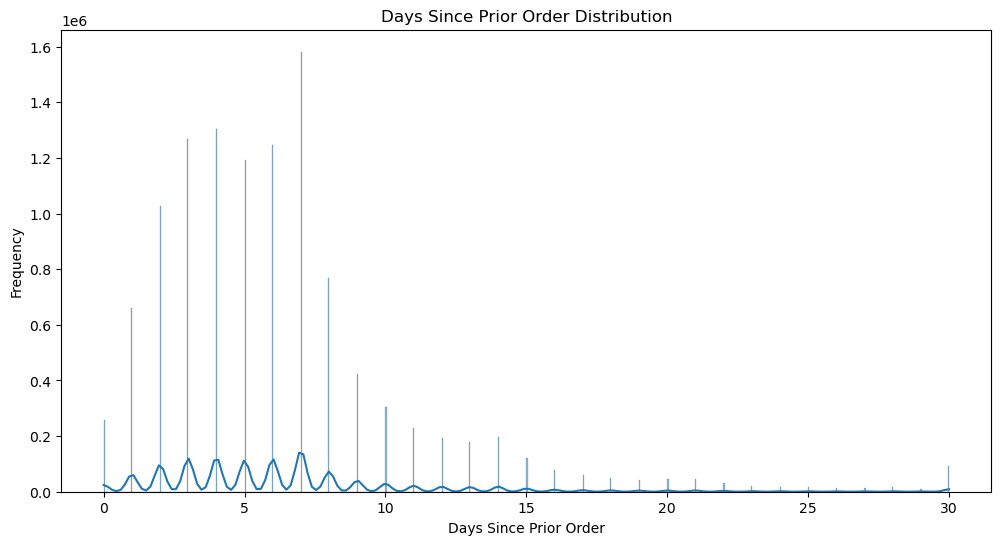

In [168]:
plt.figure(figsize=(12, 6))
sns.histplot(top_10_outliers['days_since_prior_order'].dropna(), kde=True)
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')

plt.show()

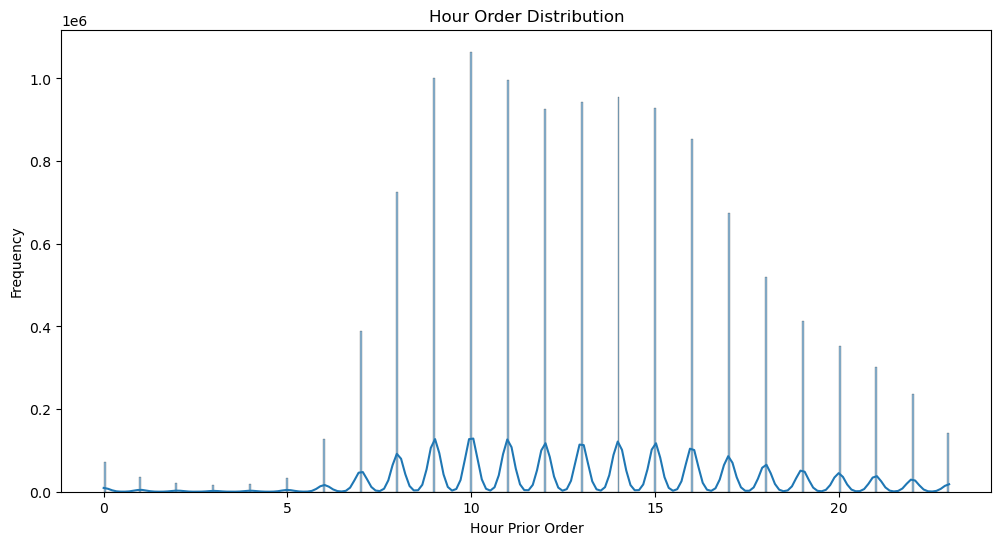

In [172]:
plt.figure(figsize=(12, 6))
sns.histplot(top_10_outliers['order_hour_of_day'], kde=True)
plt.title('Hour Order Distribution')
plt.xlabel('Hour Prior Order')
plt.ylabel('Frequency')

plt.show()

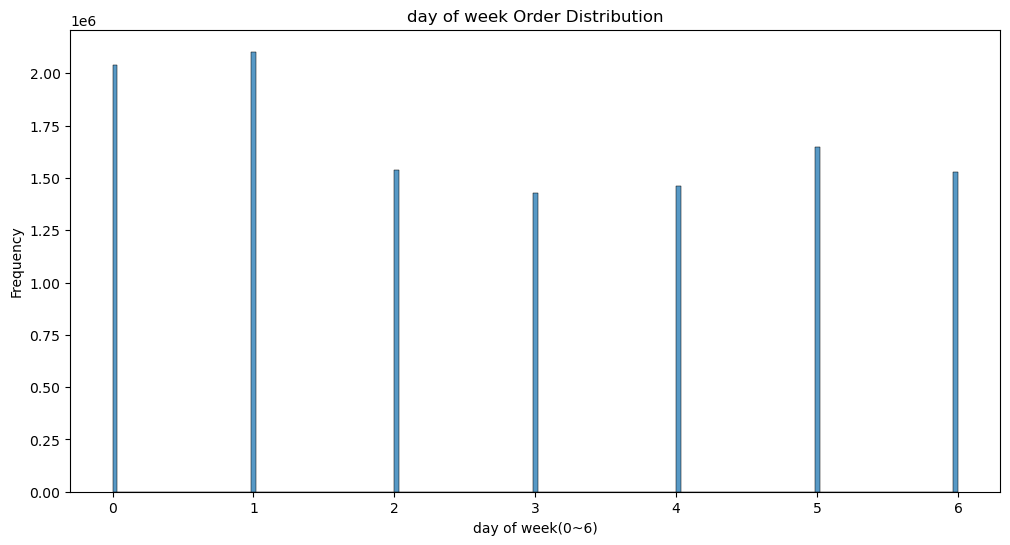

In [175]:
plt.figure(figsize=(12, 6))
sns.histplot(top_10_outliers['order_dow'])
plt.title('day of week Order Distribution')
plt.xlabel('day of week(0~6)')
plt.ylabel('Frequency')

plt.show()

- 주문 수에서의 이상치인 유저 ID만 사용하여 주문 날짜 확인 결과
- 주기가 매우 짧은 것을 확인 할 수 있습니다.
- 추측상 자동 구매 기능을 사용한 것으로 보이기도 합니다.
- 전체 데이터에서는 30일 주기로 사는 사람도 많았었는데 해당 데이터에는 매우 적은 것으로 확인`
- instacart기능 중 자동 구매 기능이 있는 것으로 확인 되었고 해당 기능은 주기를 설정할 수 있으며 시간대를 설정하진 못하지만 여러 유연한 시간대 옵션을 선택할 수 있다고 합니다.

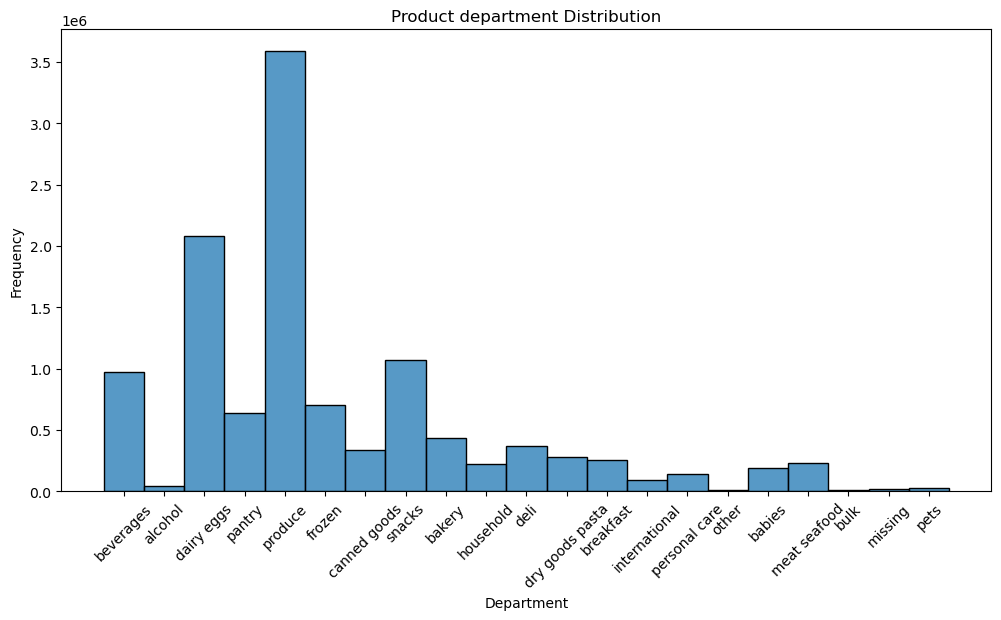

In [183]:
plt.figure(figsize=(12, 6))
sns.histplot(top_10_outliers['department'])
plt.title('Product department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

역시 예상대로 식료품들은 유통기한도 짧고 꾸준히 먹는 식품이기 때문에 주기적으로 주문하도록 설정되어 있는 듯합니다.

In [186]:
produce_outliers_count_df = top_10_outliers.groupby('product_name')['product_name'].count().to_frame()
produce_outliers_count_df.rename(columns={'product_name':'count'}, inplace=True)
produce_outliers_count_df.sort_values(by='count', ascending=False).head(10)

,count
product_name,
Banana,177706
Bag of Organic Bananas,163218
Organic Strawberries,117817
Organic Hass Avocado,94605
Organic Baby Spinach,90550
Organic Raspberries,63262
Organic Whole Milk,63003
Organic Avocado,58081
Limes,51741


### 이상치 아닌 유저들의 구매 주기 확인해보기

In [189]:
not_outliers = prior_df[prior_df['user_id'].isin(outlier_list) == False]

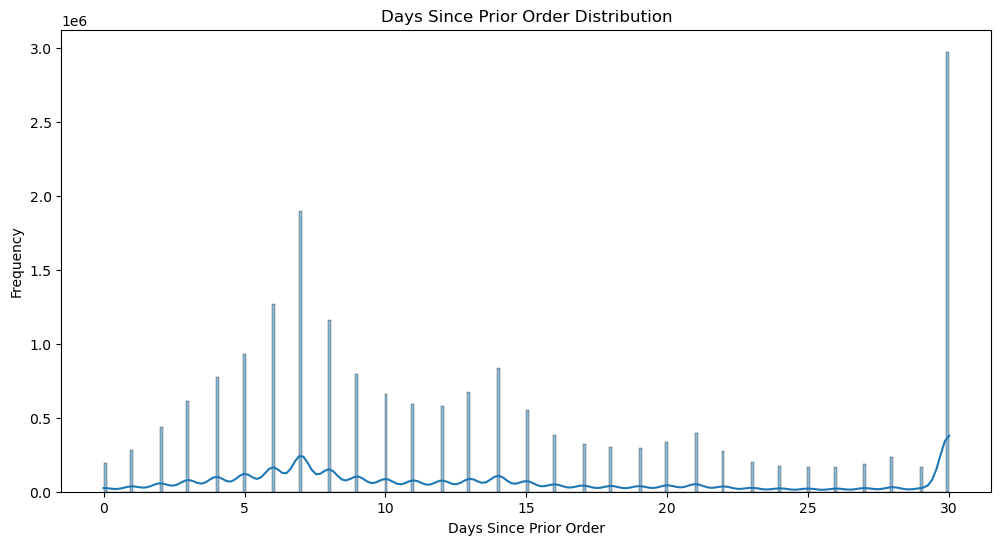

In [193]:
plt.figure(figsize=(12, 6))
sns.histplot(not_outliers['days_since_prior_order'].dropna(), kde=True)
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')

plt.show()

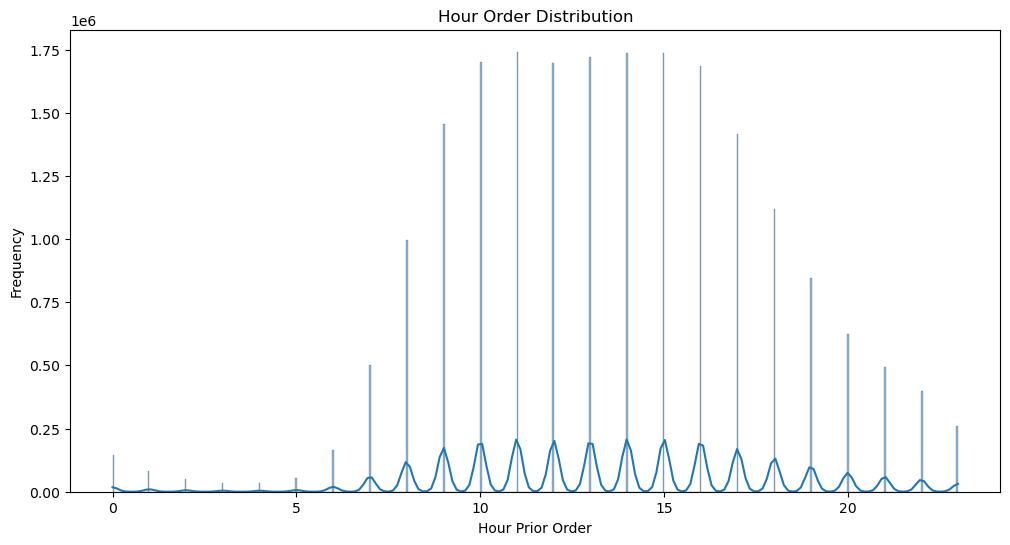

In [195]:
plt.figure(figsize=(12, 6))
sns.histplot(not_outliers['order_hour_of_day'], kde=True)
plt.title('Hour Order Distribution')
plt.xlabel('Hour Prior Order')
plt.ylabel('Frequency')

plt.show()

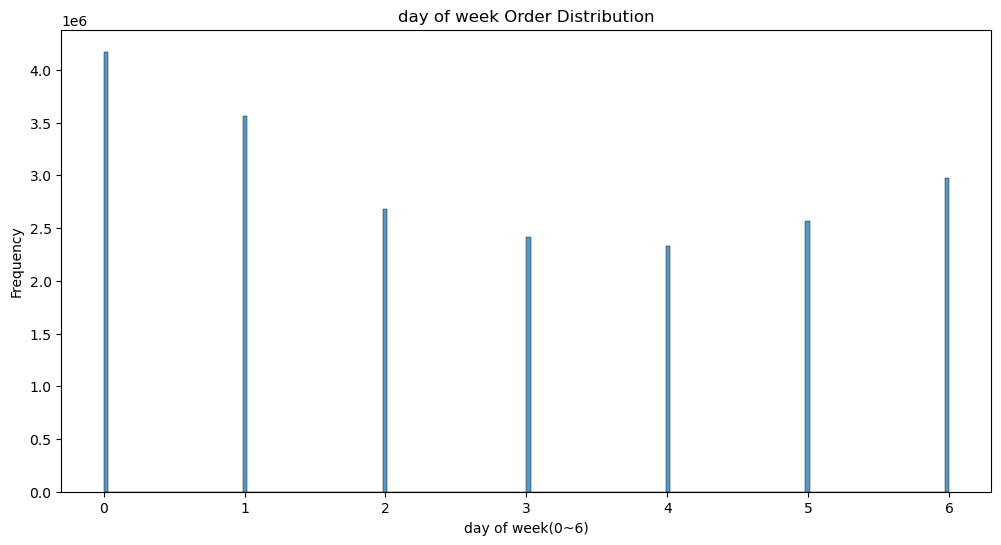

In [197]:
plt.figure(figsize=(12, 6))
sns.histplot(not_outliers['order_dow'])
plt.title('day of week Order Distribution')
plt.xlabel('day of week(0~6)')
plt.ylabel('Frequency')

plt.show()

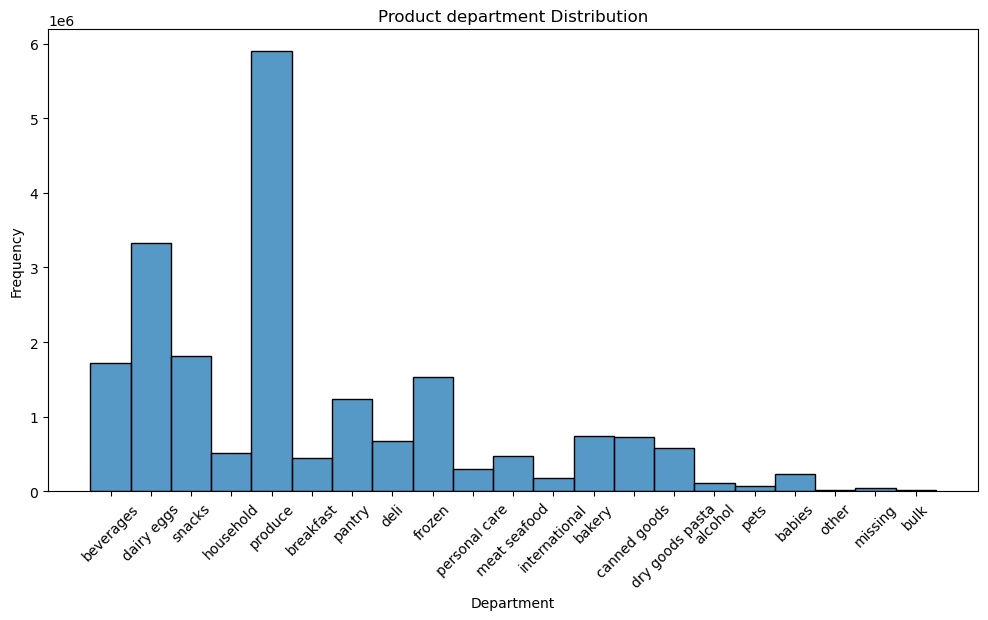

In [199]:
plt.figure(figsize=(12, 6))
sns.histplot(not_outliers['department'])
plt.title('Product department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

- 확인 결과 다른 점으로는 30일 주기로 사는 비율이 꽤 많은 것입니다.
- 하지만 30일 전에 구매한 사람들이 돌아왔을 비율이 궁금합니다.
- 한 번 확인 해보겠습니다.

In [218]:
# 30일 전에 산 품목 확인
not_outliers[(not_outliers['days_since_prior_order'] == 30) & (not_outliers['order_id'] == 2550362)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,product_id,add_to_cart_order,reordered,aisle_id,department_id
50,2550362,1,prior,10,4,8,30.0,Soda,soft drinks,beverages,196,1,1,77,7
51,2550362,1,prior,10,4,8,30.0,Zero Calorie Cola,soft drinks,beverages,46149,2,1,77,7
52,2550362,1,prior,10,4,8,30.0,Milk Chocolate Almonds,candy chocolate,snacks,39657,3,0,45,19
53,2550362,1,prior,10,4,8,30.0,0% Greek Strained Yogurt,yogurt,dairy eggs,38928,4,0,120,16
54,2550362,1,prior,10,4,8,30.0,Organic String Cheese,packaged cheese,dairy eggs,25133,5,1,21,16
55,2550362,1,prior,10,4,8,30.0,Pistachios,nuts seeds dried fruit,snacks,10258,6,1,117,19
56,2550362,1,prior,10,4,8,30.0,Organic Unsweetened Almond Milk,soy lactosefree,dairy eggs,35951,7,0,91,16
57,2550362,1,prior,10,4,8,30.0,Cinnamon Toast Crunch,cereal,breakfast,13032,8,1,121,14
58,2550362,1,prior,10,4,8,30.0,Original Beef Jerky,popcorn jerky,snacks,12427,9,1,23,19


In [229]:
revisited_users = prior_df[prior_df['days_since_prior_order'] == 30]['user_id'].unique().tolist()

print(len(revisited_users))
# 30일 전 구매한 유저들의 수

141127


In [233]:
revisited_users = prior_df[prior_df['user_id'].isin(revisited_users)]

In [241]:
revisited_users_true = revisited_users[revisited_users['days_since_prior_order'] != 30]

In [251]:
revisited_users_true_list = revisited_users_true['user_id'].unique().tolist()

In [253]:
len(revisited_users_true_list)

141127

해당 데이터에는 모든 유저들이 복귀한 것으로 확인이됨.